In [ ]:
# https://www.youtube.com/watch?v=6f67zrH-_IE

In [ ]:
# https://towardsdatascience.com/pytorch-lstms-for-time-series-data-cd16190929d7

In [ ]:
# https://stackabuse.com/time-series-prediction-using-lstm-with-pytorch-in-python/
# Below
# https://colab.research.google.com/github/dlmacedo/starter-academic/blob/master/content/courses/deeplearning/notebooks/pytorch/Time_Series_Prediction_with_LSTM_Using_PyTorch.ipynb

In [ ]:
# https://towardsdatascience.com/lstm-time-series-forecasting-predicting-stock-prices-using-an-lstm-model-6223e9644a2f

In [4]:
# Run git clone from the command line within colab notebook environment
!git clone https://github.com/sigadavid96/LSTM_TimeSeriesForecasting

Cloning into 'LSTM_TimeSeriesForecasting'...
remote: Enumerating objects: 7, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 7 (delta 1), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (7/7), done.


In [ ]:
!wget https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv

--2022-04-04 03:37:28--  https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2180 (2.1K) [text/plain]
Saving to: ‘airline-passengers.csv’

airline-passengers. 100%[===================>]   2.13K  --.-KB/s    in 0s      

2022-04-04 03:37:28 (57.5 MB/s) - ‘airline-passengers.csv’ saved [2180/2180]



In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch
import torch.nn as nn
from torch.autograd import Variable
from sklearn.preprocessing import MinMaxScaler

In [7]:
pd.read_csv('/content/LSTM_TimeSeriesForecasting/TSLA.csv')

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-04-05,60.408001,60.976002,58.840000,59.000000,59.000000,39404500
1,2017-04-06,59.375999,60.388000,58.820000,59.740002,59.740002,27603000
2,2017-04-07,59.500000,60.537998,59.430000,60.507999,60.507999,22898000
3,2017-04-10,61.830002,62.745998,61.742001,62.478001,62.478001,38322500
4,2017-04-11,62.675999,62.694000,61.099998,61.742001,61.742001,28623000
...,...,...,...,...,...,...,...
815,2020-07-01,216.600006,227.065994,216.100006,223.925995,223.925995,66634500
816,2020-07-02,244.296005,245.600006,237.119995,241.731995,241.731995,86250500
817,2020-07-06,255.337997,275.558014,253.207993,274.316010,274.316010,102849500
818,2020-07-07,281.002014,285.899994,267.342010,277.971985,277.971985,107448500


In [9]:
df=pd.read_csv('/content/LSTM_TimeSeriesForecasting/TSLA.csv')
df_clean=df[['Date','Close']]
X=df_clean['Date']
y=df_clean['Close']

In [25]:
y_train

264     56.692001
673     67.178001
570     49.015999
395     66.970001
731    149.102005
          ...    
71      65.648003
106     68.905998
270     60.230000
435     63.226002
102     70.636002
Name: Close, Length: 549, dtype: float64

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

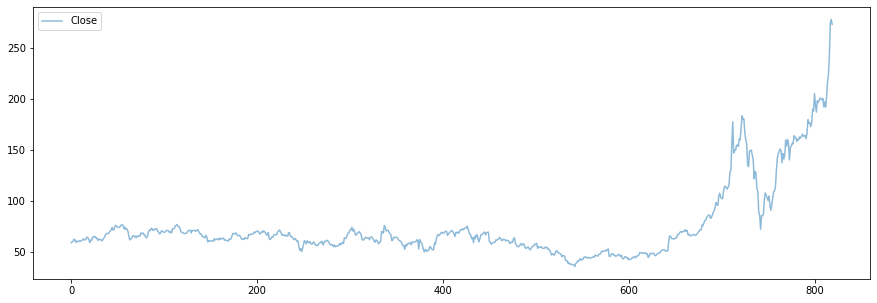

In [23]:
training_set = y_train
df[['Close']].plot(figsize = (15, 5), alpha = 0.5)

In [24]:
from statsmodels.tsa.seasonal import seasonal_decompose
def decompose(df, column_name):
    """
    A function that returns the trend, seasonality and residual captured by applying both multiplicative and
    additive model.
    df -> DataFrame
    column_name -> column_name for which trend, seasonality is to be captured
    """
    result_mul = seasonal_decompose(df[column_name], model='multiplicative', extrapolate_trend = 'freq')
    result_add = seasonal_decompose(df[column_name], model = 'additive', extrapolate_trend='freq')

    plt.rcParams.update({'figure.figsize': (20, 10)})
    result_mul.plot().suptitle('Multiplicative Decompose', fontsize=30)
    result_add.plot().suptitle('Additive Decompose', fontsize=30)
    plt.show()
    
    return result_mul, result_add

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
def sliding_windows(data, seq_length):
    x = []
    y = []

    for i in range(len(data)-seq_length-1):
        _x = data[i:(i+seq_length)]
        _y = data[i+seq_length]
        x.append(_x)
        y.append(_y)

    return np.array(x),np.array(y)

sc = MinMaxScaler()
training_data = sc.fit_transform(training_set)

seq_length = 4
x, y = sliding_windows(training_data, seq_length)

train_size = int(len(y) * 0.67)
test_size = len(y) - train_size

dataX = Variable(torch.Tensor(np.array(x)))
dataY = Variable(torch.Tensor(np.array(y)))

trainX = Variable(torch.Tensor(np.array(x[0:train_size])))
trainY = Variable(torch.Tensor(np.array(y[0:train_size])))

testX = Variable(torch.Tensor(np.array(x[train_size:len(x)])))
testY = Variable(torch.Tensor(np.array(y[train_size:len(y)])))

In [ ]:
class LSTM(nn.Module):

    def __init__(self, num_classes, input_size, hidden_size, num_layers):
        super(LSTM, self).__init__()
        
        self.num_classes = num_classes
        self.num_layers = num_layers
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.seq_length = seq_length
        
        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size,
                            num_layers=num_layers, batch_first=True)
        
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        h_0 = Variable(torch.zeros(
            self.num_layers, x.size(0), self.hidden_size))
        
        c_0 = Variable(torch.zeros(
            self.num_layers, x.size(0), self.hidden_size))
        
        # Propagate input through LSTM
        ula, (h_out, _) = self.lstm(x, (h_0, c_0))
        
        h_out = h_out.view(-1, self.hidden_size)
        
        out = self.fc(h_out)
        
        return out

In [ ]:
num_epochs = 2000
learning_rate = 0.01

input_size = 1
hidden_size = 2
num_layers = 1

num_classes = 1

lstm = LSTM(num_classes, input_size, hidden_size, num_layers)

criterion = torch.nn.MSELoss()    # mean-squared error for regression
optimizer = torch.optim.Adam(lstm.parameters(), lr=learning_rate)
#optimizer = torch.optim.SGD(lstm.parameters(), lr=learning_rate)

# Train the model
for epoch in range(num_epochs):
    outputs = lstm(trainX)
    optimizer.zero_grad()
    
    # obtain the loss function
    loss = criterion(outputs, trainY)
    
    loss.backward()
    
    optimizer.step()
    if epoch % 100 == 0:
      print("Epoch: %d, loss: %1.5f" % (epoch, loss.item()))

Epoch: 0, loss: 0.16023
Epoch: 100, loss: 0.00382
Epoch: 200, loss: 0.00341
Epoch: 300, loss: 0.00301
Epoch: 400, loss: 0.00259
Epoch: 500, loss: 0.00225
Epoch: 600, loss: 0.00204
Epoch: 700, loss: 0.00191
Epoch: 800, loss: 0.00184
Epoch: 900, loss: 0.00180
Epoch: 1000, loss: 0.00178
Epoch: 1100, loss: 0.00177
Epoch: 1200, loss: 0.00176
Epoch: 1300, loss: 0.00175
Epoch: 1400, loss: 0.00175
Epoch: 1500, loss: 0.00174
Epoch: 1600, loss: 0.00173
Epoch: 1700, loss: 0.00172
Epoch: 1800, loss: 0.00171
Epoch: 1900, loss: 0.00170


In [ ]:
dataX[0]

tensor([[0.0154],
        [0.0270],
        [0.0541],
        [0.0483]])

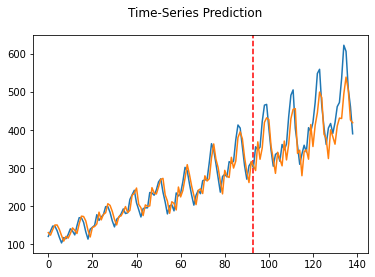

In [ ]:
lstm.eval()
train_predict = lstm(dataX)

data_predict = train_predict.data.numpy()
dataY_plot = dataY.data.numpy()

data_predict = sc.inverse_transform(data_predict)
dataY_plot = sc.inverse_transform(dataY_plot)

plt.axvline(x=train_size, c='r', linestyle='--')

plt.plot(dataY_plot)
plt.plot(data_predict)
plt.suptitle('Time-Series Prediction')
plt.show()

In [26]:
import time
import numpy as np
import pandas as pd
import pandas_datareader as pdr

from keras.layers import LSTM
from keras.models import Sequential
from keras.layers.wrappers import TimeDistributed
from keras.layers.core import Dense, Activation, Dropout

from sklearn.preprocessing import MinMaxScaler



import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
import pandas_datareader as pdr
def get_raw_data(index_name,retry_attempts = 3):   
    if index_name:
        while retry_attempts > 0 :
            try:
                df = pdr.get_data_yahoo(index_name)
                new_df = df.reindex(index=pd.date_range(df.index.min(), 
                                          df.index.max(), 
                                          freq='D')).fillna(method='ffill')
                retry_attempts = 0
                return new_df
            except:
                print("Data pull failed. {} retry attempts remaining".\
                      format(retry_attempts))
                retry_attempts = retry_attempts - 1
    else:
        print("Invalid usage. Parameter index_name is required")
    return None

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-04-05,60.408001,60.976002,58.840000,59.000000,59.000000,39404500
2017-04-06,59.375999,60.388000,58.820000,59.740002,59.740002,27603000
2017-04-07,59.500000,60.537998,59.430000,60.507999,60.507999,22898000
2017-04-10,61.830002,62.745998,61.742001,62.478001,62.478001,38322500
2017-04-11,62.675999,62.694000,61.099998,61.742001,61.742001,28623000


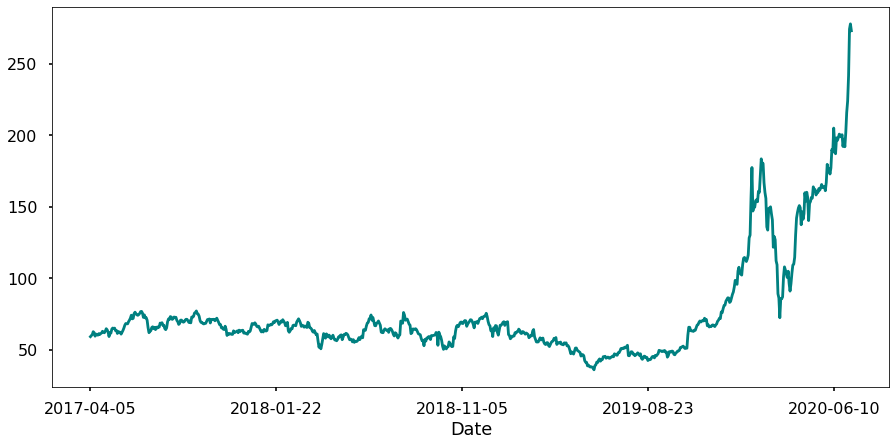

In [32]:
sp_df = df
sp_df=sp_df.set_index('Date')

sp_close_series = sp_df.Close
plt.style.use('seaborn-poster')
sp_close_series.plot(figsize=(15, 7), color = 'teal')
sp_df.head()

In [30]:
sp_df.index.min(), sp_df.index.max()

('2017-04-05', '2020-07-08')

In [33]:
WINDOW = 6
PRED_LENGTH = int(WINDOW/2)
def get_reg_train_test(timeseries,sequence_length= 51,
                   train_size=0.9,roll_mean_window=5,
                   normalize=True,scale=False):
    # smoothen out series
    if roll_mean_window:
        timeseries = timeseries.rolling(roll_mean_window).mean().dropna()
    
    # create windows
    result = []
    for index in range(len(timeseries) - sequence_length):
        result.append(timeseries[index: index + sequence_length])
           
    
    # normalize data as a variation of 0th index
    if normalize:
        normalised_data = []
        for window in result:
            normalised_window = [((float(p) / float(window[0])) - 1) \
                                   for p in window]
            normalised_data.append(normalised_window)
        result = normalised_data
    
    # identify train-test splits
    result = np.array(result) 
    row = round(train_size * result.shape[0])
    
    # split train and test sets
    train = result[:int(row), :]
    test = result[int(row):, :]
    
    # scale data in 0-1 range
    scaler = None
    if scale:
        scaler=MinMaxScaler(feature_range=(0, 1))
        train = scaler.fit_transform(train)
        test = scaler.transform(test)
      
    # split independent and dependent variables  
    x_train = train[:, :-1]
    y_train = train[:, -1]
        
        
    x_test = test[:, :-1]
    y_test = test[:, -1]
    
    # Transforms for LSTM input
    x_train = np.reshape(x_train, (x_train.shape[0], 
                                   x_train.shape[1], 
                                   1))
    x_test = np.reshape(x_test, (x_test.shape[0], 
                                 x_test.shape[1], 
                                 1)) 
    
    return x_train,y_train,x_test,y_test,scaler






x_train,y_train,x_test,y_test,scaler = get_reg_train_test(sp_close_series,
                                                      sequence_length=WINDOW+1,
                                                      roll_mean_window=None,
                                                      normalize=True,
                                                      scale=False)
    
print("Data Split Complete")

print("x_train shape={}".format(x_train.shape))
print("y_train shape={}".format(y_train.shape))
print("x_test shape={}".format(x_test.shape))
print("y_test shape={}".format(y_test.shape))

Data Split Complete
x_train shape=(732, 6, 1)
y_train shape=(732,)
x_test shape=(81, 6, 1)
y_test shape=(81,)


In [34]:
from keras.layers import LSTM
from keras.models import Sequential
from keras.layers.wrappers import TimeDistributed
from keras.layers.core import Dense, Activation, Dropout

from sklearn.preprocessing import MinMaxScaler
import time

def get_reg_model(layer_units=[100,100],dropouts=[0.2,0.2],window_size=50):
    # build LSTM network
    model = Sequential()
    
    # hidden layer 1
    model.add(LSTM(layer_units[0], 
                   input_shape=(window_size,1), 
                   return_sequences=True))
    model.add(Dropout(dropouts[0]))
    
    # hidden layer 2
    model.add(LSTM(layer_units[1]))
    model.add(Dropout(dropouts[1]))
    
    # output layer
    model.add(Dense(1))
    model.add(Activation("linear"))
    
    start = time.time()
    model.compile(loss="mse", optimizer="rmsprop")
    print("> Compilation Time : ", time.time() - start)
    print(model.summary())
    return model

lstm_model=None
try:
    lstm_model = get_reg_model(layer_units=[50,100],
                           window_size=WINDOW)   
except:
    print("Model Build Failed. Trying Again")
    lstm_model = get_reg_model(layer_units=[50,100],
                           window_size=WINDOW)

> Compilation Time :  0.006961822509765625
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 6, 50)             10400     
                                                                 
 dropout (Dropout)           (None, 6, 50)             0         
                                                                 
 lstm_1 (LSTM)               (None, 100)               60400     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
 activation (Activation)     (None, 1)                 0         
                                                                 
Total params:

In [41]:
import keras
from sklearn.metrics import mean_squared_error



callbacks = [keras.callbacks.EarlyStopping(monitor='val_loss',
                                           patience=2,
                                           verbose=0)]
lstm_model.fit(x_train, y_train, 
               epochs=25, batch_size=16,
               verbose=1,validation_split=0.05,
               callbacks=callbacks)
print("Model Fit Complete")

Epoch 1/25
44/44 [==============================] - 1s 20ms/step - loss: 0.0012 - val_loss: 0.0075
Epoch 2/25
44/44 [==============================] - 1s 20ms/step - loss: 0.0012 - val_loss: 0.0074
Epoch 3/25
44/44 [==============================] - 1s 17ms/step - loss: 0.0012 - val_loss: 0.0077
Epoch 4/25
44/44 [==============================] - 1s 18ms/step - loss: 0.0012 - val_loss: 0.0072
Epoch 5/25
44/44 [==============================] - 1s 15ms/step - loss: 0.0011 - val_loss: 0.0071
Epoch 6/25
44/44 [==============================] - 1s 15ms/step - loss: 0.0012 - val_loss: 0.0074
Epoch 7/25
44/44 [==============================] - 1s 15ms/step - loss: 0.0012 - val_loss: 0.0075
Model Fit Complete


In [37]:
import math
def predict_reg_multiple(model, data, window_size=6, prediction_len=3):
    prediction_list = []
    
    # loop for every sequence in the dataset
    for window in range(int(len(data)/prediction_len)):
        _seq = data[window*prediction_len]
        predicted = []
        # loop till required prediction length is achieved
        for j in range(prediction_len):
            predicted.append(model.predict(_seq[np.newaxis,:,:])[0,0])
            _seq = _seq[1:]
            _seq = np.insert(_seq, [window_size-1], predicted[-1], axis=0)
        prediction_list.append(predicted)
    return prediction_list


train_pred_seqs = predict_reg_multiple(lstm_model,
                                             x_train,
                                             window_size=WINDOW,
                                             prediction_len=PRED_LENGTH)

train_offset = y_train.shape[0] - np.array(train_pred_seqs).flatten().shape[0]

train_rmse = math.sqrt(mean_squared_error(y_train[train_offset:], 
                                          np.array(train_pred_seqs).\
                                          flatten()))
print('Train Score: %.2f RMSE' % (train_rmse))

Train Score: 0.07 RMSE


In [39]:
test_pred_seqs = predict_reg_multiple(lstm_model,
                                      x_test,
                                      window_size=WINDOW,
                                      prediction_len=PRED_LENGTH)
test_offset = y_test.shape[0] - np.array(test_pred_seqs).flatten().shape[0]

test_rmse = math.sqrt(mean_squared_error(y_test[test_offset:], 
                                          np.array(test_pred_seqs).\
                                          flatten()))
print('Test Score: %.2f RMSE' % (test_rmse))

Test Score: 0.12 RMSE


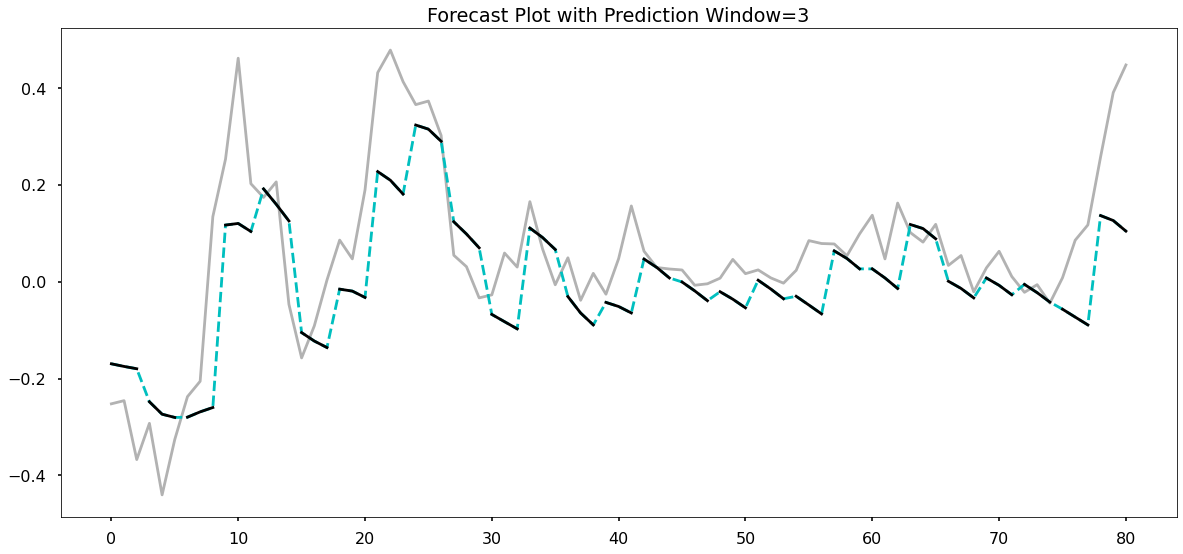

In [40]:
def plot_reg_results(predicted_data, true_data, prediction_len=3):
    fig = plt.figure(facecolor='white', figsize=(20, 9))
    ax = fig.add_subplot(111)
    
    # plot actual data
    ax.plot(true_data, 
            label='True Data',
            c='black',alpha=0.3)
    
    # plot flattened data
    plt.plot(np.array(predicted_data).flatten(), 
             label='Prediction_full',
             c='c',linestyle='--')
    
    #plot each window in the prediction list
    for i, data in enumerate(predicted_data):
        padding = [None for p in range(i * prediction_len)]
        plt.plot(padding + data, label='Prediction',c='black')

    plt.title("Forecast Plot with Prediction Window={}".format(prediction_len))
    plt.show()



plot_reg_results(test_pred_seqs,y_test,prediction_len=PRED_LENGTH)